In [69]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

### Question about the data
- What is the company about, where does the data come from -> (sales in online store)
- Is the Id and the customer_id the same?
- in the columns [days_since_last_login, avg_time_spent, points_in_wallet, avg_frequency_login_days] have negative values, is that correct?
- What is security_no,preferred_offer_types, avg_transaction_value, offer_application_preference 
- when we say medium_of_operation does it mean which platform the customer is using? -> the platform the customer is using
- What does the Error mean in avg_frequency_login_days and what does the column mean?

#### Displaying the top 5 rows of the data

In [70]:
df = pd.read_csv('churn_dataset_train.csv')
df.head()

,ID,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn
0,1644,fffe43004900440033003200390032003400,Dusty Dunneback,30,F,URPJZ5B,Village,No Membership,09/08/2017,Yes,...,118.390000,10579.56,24,610.360000,Yes,No,No,Not Applicable,Poor Product Quality,1
1,8516,fffe43004900440036003200310038003600,Dorine Vanduyn,55,M,O0IWUYW,Village,Silver Membership,09/02/2016,No,...,179.420000,22963.05,27,694.650000,Yes,No,No,Not Applicable,Poor Product Quality,0
2,15564,fffe430049004400350032003200,Christene Pulver,47,M,2R0EFA2,City,Basic Membership,11/06/2017,Yes,...,42.230000,32604.41,Error,520.620000,Yes,No,No,Not Applicable,Poor Product Quality,1
3,22211,fffe43004900440032003200380034003600,Brendan Enciso,18,M,XF0YGUT,Town,Gold Membership,09/02/2016,No,...,-1035.833706,48913.61,27,1150.093442,Yes,No,No,Not Applicable,Too many ads,0
4,32088,fffe43004900440035003600320032003100,Lizette Lemons,28,F,V5YZC2N,City,No Membership,16/07/2017,Yes,...,449.770000,20010.02,14,653.040000,Yes,Yes,Yes,No Information Available,No reason specified,0


In [71]:
len(df.ID.unique()) , len(df.customer_id.unique()), len(df.customer_id.unique()) == len(df.ID.unique())

(24784, 24784, True)

In [72]:
df.customer_id.unique(), len(df.customer_id.unique()) == len(df.ID.unique())

(array(['fffe43004900440033003200390032003400',
        'fffe43004900440036003200310038003600',
        'fffe430049004400350032003200', ...,
        'fffe43004900440035003400320034003000',
        'fffe4300490044003400360034003200',
        'fffe43004900440032003300390031003800'], dtype=object),
 True)

#### Showing the data types of the columns and the number of non null values

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24784 entries, 0 to 24783
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            24784 non-null  int64  
 1   customer_id                   24784 non-null  object 
 2   Name                          24784 non-null  object 
 3   age                           24784 non-null  int64  
 4   gender                        24784 non-null  object 
 5   security_no                   24784 non-null  object 
 6   region_category               21087 non-null  object 
 7   membership_category           24784 non-null  object 
 8   joining_date                  24784 non-null  object 
 9   joined_through_referral       21158 non-null  object 
 10  referral_id                   12787 non-null  object 
 11  preferred_offer_types         24576 non-null  object 
 12  medium_of_operation           21156 non-null  object 
 13  i

* For the number columns, we see the distribution of the data, mean std, min, max, 25%, 50%, 75%
* It also show the count of the non null values

In [74]:
df.describe()


,ID,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn
count,24784.000000,24784.000000,24784.000000,24784.000000,24784.000000,22497.000000,24784.000000
mean,18467.497014,36.986967,-42.462314,241.974449,29307.237880,686.287574,0.265655
std,10660.308320,15.860701,229.834676,395.333687,19436.878248,193.175055,0.441690
min,0.000000,10.000000,-999.000000,-2281.236526,800.460000,-549.357498,0.000000
25%,9262.750000,23.000000,8.000000,60.165000,14194.192500,616.410000,0.000000
50%,18495.500000,37.000000,12.000000,161.390000,27612.555000,696.920000,0.000000
75%,27676.250000,51.000000,16.000000,354.725000,40862.025000,763.090000,1.000000
max,36989.000000,64.000000,26.000000,3040.410000,99914.050000,1816.933696,1.000000


* For the feedback columns, we see the number of unique values, the top value and the frequency of that value

In [75]:
df.feedback.value_counts()

feedback
Poor Product Quality        4309
Too many ads                4238
Poor Customer Service       4210
Poor Website                4206
No reason specified         4128
User Friendly Website        940
Reasonable Price             937
Products always in Stock     934
Quality Customer Care        882
Name: count, dtype: int64

* For the columns which have missing values show the number of missing values

In [115]:
df.isnull().sum()[df.isnull().sum() > 0]

referral_id              11029
preferred_offer_types      208
medium_of_operation       3628
points_in_wallet          2287
time_spent_bin            1148
dtype: int64

In [116]:
df.preferred_offer_types.value_counts()

preferred_offer_types
Gift Vouchers/Coupons       8305
Credit/Debit Card Offers    8232
Without Offers              8039
Name: count, dtype: int64

In [78]:
df.columns

Index(['ID', 'customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn'],
      dtype='object')

#### Data transformation

In [79]:
# change the columns to be 1 if the user Yes and 0 if the user No
df['is_male'] = df.gender.apply(lambda x: 1 if x == 'M' else 0)
df.joined_through_referral = df.joined_through_referral.apply(lambda x: 1 if x == 'Yes' else 0)
df['used_special_discount'] = df['used_special_discount'].apply(lambda x: 1 if x == 'Yes' else 0)
df['offer_application_preference'] = df['offer_application_preference'].apply(lambda x: 1 if x == 'Yes' else 0)
df['past_complaint'] = df['past_complaint'].apply(lambda x: 1 if x == 'Yes' else 0)


In [80]:
# fill the referral_id rows witch have value 1 on joined_through_referral and no referral_id with referral_id = customer_id
df.loc[(df.joined_through_referral == 1) & (df.referral_id.isnull()), 'referral_id'] = df.loc[(df.joined_through_referral == 1) & (df.referral_id.isnull()), 'customer_id']

In [81]:
value_counts = df.region_category.value_counts()
value_counts = value_counts.reset_index()
value_counts.columns = ['region_category', 'count']
fig = px.pie(value_counts, 
             names='region_category', 
             values='count', 
             title='Region Category Distribution',
             )
fig.update_traces(textposition='inside', textinfo='percent+label',textfont=dict(size=18) )
fig.update_layout(title_x=0.5)
fig.show()


In [82]:
# Group by region and internet option
grouped = df.groupby(['region_category', 'internet_option']).size().reset_index(name='count')

# Create the bar chart
fig = px.bar(grouped,
             x='region_category',
             y='count',
             color='internet_option',  # 🎨 Color by internet option
             title='Count by Region and Internet Option',
             labels={
                 'region_category': 'Region',
                 'internet_option': 'Internet Option',
                 'count': 'Count'
             },
             barmode='stack')  # or 'group' if you want side-by-side bars

fig.show()


In [83]:
# Group by both membership and region categories
grouped = df.groupby(['membership_category', 'region_category']).size().reset_index(name='count')

# Create bar chart with hue (color) by region_category
fig = px.bar(grouped,
             x='membership_category',
             y='count',
             color='region_category',  # 🎨 Hue here
             title='Membership Category Distribution by Region',
             labels={
                 'membership_category': 'Membership Category',
                 'count': 'Count',
                 'region_category': 'Region Category'
             },
             barmode='stack')  

fig.show()


In [114]:
# filling missing region_category values with the unknown 
df.loc[df.region_category.isnull(), 'region_category'] = 'Unknown'

In [132]:
# set all the negative values of points_in_wallet, avg_transaction_value, avg_time_spent, time_spent_bin to there absolute value
df['points_in_wallet'] = df['points_in_wallet'].abs()
df['avg_transaction_value'] = df['avg_transaction_value'].abs()
df['avg_time_spent'] = df['avg_time_spent'].abs()
df['time_spent_bin'] = df['time_spent_bin'].abs()
# set the missing values of points_in_wallet, avg_transaction_value, avg_time_spent to the mean of the column
df['points_in_wallet'].fillna(df['points_in_wallet'].mean(), inplace=True)
df['avg_transaction_value'].fillna(df['avg_transaction_value'].mean(), inplace=True)
df['avg_time_spent'].fillna(df['avg_time_spent'].mean(), inplace=True)
df['time_spent_bin'].fillna(df['time_spent_bin'].mean(), inplace=True)

TypeError: Object with dtype category cannot perform the numpy op absolute

In [85]:
# age distribution
fig = px.histogram(df, x='age', nbins=26, title='Age Distribution', color='gender')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(title_x=0.5)
fig.show()

In [86]:
df.referral_id.value_counts()
# # Get top 15 referral_id value counts
# top_referrals = df.referral_id.value_counts().nlargest(30).reset_index()
# top_referrals.columns = ['referral_id', 'count']

# # Create bar chart
# fig = px.bar(top_referrals,
#              x='referral_id',
#              y='count',
#              title='Top 15 Referral IDs by Count',
#              labels={'referral_id': 'Referral ID', 'count': 'Count'})

# fig.show()

referral_id
CID3979     10
CID43705     9
CID49601     8
CID49598     8
CID62015     8
            ..
CID23271     1
CID36526     1
CID56650     1
CID48373     1
CID31329     1
Name: count, Length: 9706, dtype: int64

- We show in this section couple of anomalies in the data
- There are clients which join through referral but they have no referral id and there are clients which have referral id but they didn't join through referral
- The amount of clients which does not have a referral id is $968$
- The amount of clients which have a referral id but they didn't join through referral is $3250$

In [90]:
df[(df.joined_through_referral == 1) & (df.referral_id.isnull())][['joined_through_referral', 'referral_id']]


,joined_through_referral,referral_id


In [94]:
df.loc[(df['referral_id'].notnull()) & (df['joined_through_referral'] == 0), 'joined_through_referral'] = 1
df[(df.referral_id.notnull()) & (df.joined_through_referral == 0)][['joined_through_referral', 'referral_id']]


,joined_through_referral,referral_id


In [95]:
import pandas as pd
import plotly.express as px

# Select relevant columns
cols = ['age', 'days_since_last_login', 'avg_time_spent',
        'avg_transaction_value', 'points_in_wallet',]

# Calculate and round correlation
correlation = df[cols].corr().round(1)

# Plot heatmap
fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale='RdBu',
                title='Correlation Heatmap (Rounded to 0.1)')

fig.show()


In [96]:
df.internet_option.value_counts()

internet_option
Wi-Fi          8354
Mobile_Data    8253
Fiber_Optic    8177
Name: count, dtype: int64

In [97]:
import plotly.express as px

selected_cols = ['days_since_last_login', 'avg_time_spent', 'churn']
corr = df[selected_cols].corr().round(1)

fig = px.imshow(corr,
                text_auto=True,
                color_continuous_scale='RdBu',
                title='Correlation: Login Days, Time Spent & Churn')

fig.show()


In [98]:
df.complaint_status.value_counts()

complaint_status
Not Applicable              12513
Unsolved                     3120
Solved                       3081
Solved in Follow-up          3044
No Information Available     3026
Name: count, dtype: int64

In [99]:
# # df.preferred_offer_types.value_counts()
# # graph of preferred_offer_types with membership_category and region_category
# df.medium_of_operation.value_counts()
# create a histogram of points in wallet # instead of count show percent
fig = px.histogram(df, x='points_in_wallet', color='membership_category' ,nbins=30, title='Points in Wallet Distribution')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(title_x=0.5)
fig.show()


In [133]:
# count how many rows have MISSING value in one of the columns
df.isnull().sum()[df.isnull().sum() > 0]

referral_id              11029
preferred_offer_types      208
medium_of_operation       3628
time_spent_bin            1148
dtype: int64

In [101]:
# # 1. Import libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt

# # 2. Load the dataset
# df = pd.read_csv('churn_dataset_train.csv')  # Adjust path if needed

# # 3. Preprocessing
# # Drop columns that are IDs or not useful for prediction
# df = df.drop(['ID', 'customer_id', 'Name', 'security_no', 'referral_id'], axis=1)
# # Handle missing values
# df = df.fillna(0)  # Simple handling; you can improve based on deeper analysis
# df['membership_category'] = df['membership_category'].astype('category')

# # Encode categorical variables into dummy/one-hot columns
# df = pd.get_dummies(df, drop_first=True)

# # 4. Define features and target
# X = df.drop('churn', axis=1)
# y = df['churn']

# # 5. Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 6. Create and train the Decision Tree (CART) with GINI
# model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
# model.fit(X_train, y_train)

# # 7. Predict and evaluate
# y_pred = model.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # 8. Visualize the decision tree
# plt.figure(figsize=(20,10))
# plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"])
# plt.show()


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.35      0.01      0.01      1918
           1       0.45      0.99      0.62      2150
           2       0.00      0.00      0.00       712

    accuracy                           0.45      4780
   macro avg       0.27      0.33      0.21      4780
weighted avg       0.34      0.45      0.28      4780



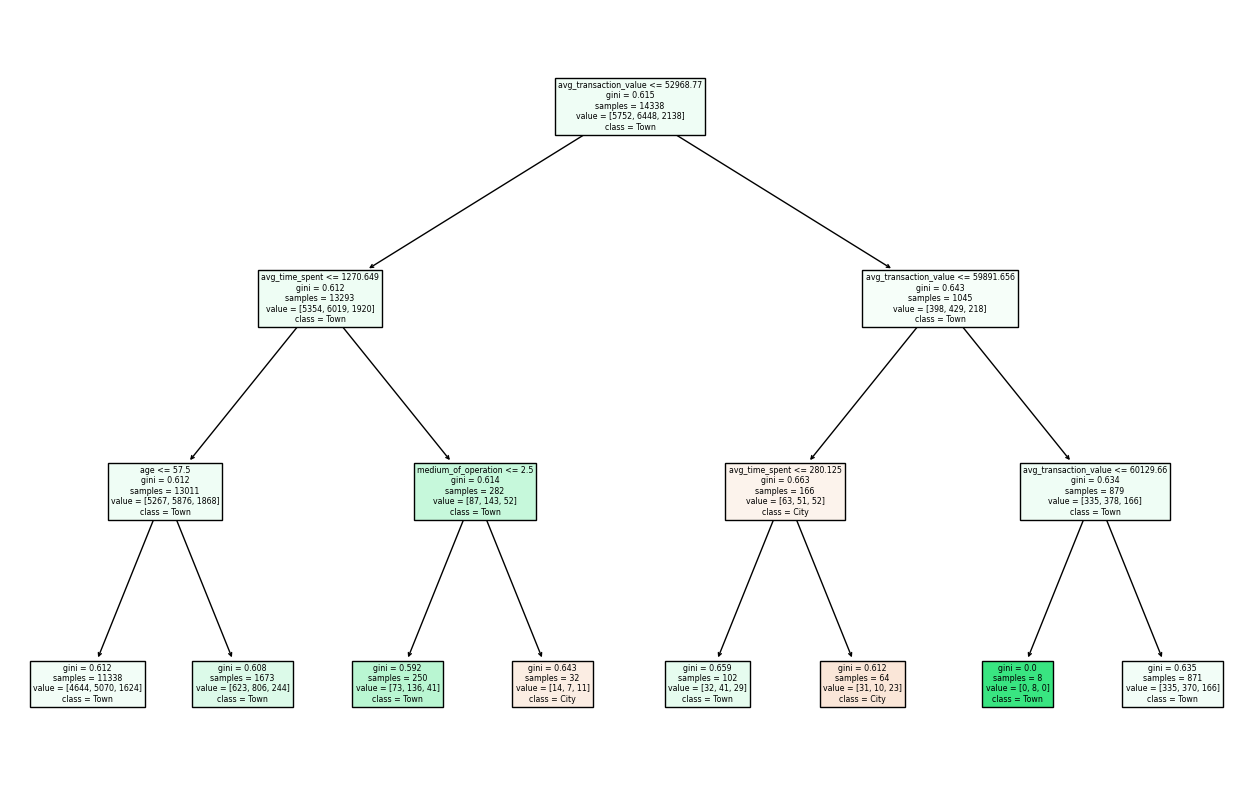

In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Drop rows with missing 'region_category' (just for training the model)
df_train = df[df['region_category'].notnull()].copy()

# Select candidate features
features = ['age', 'gender', 'medium_of_operation', 'internet_option',
            'preferred_offer_types', 'avg_time_spent', 'avg_transaction_value',
            'avg_frequency_login_days', 'points_in_wallet']

# Encode categorical variables
df_encoded = df_train[features + ['region_category']].copy()
label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

# Train/test split
X = df_encoded[features]
y = df_encoded['region_category']
# Combine X and y for easy filtering
data = pd.concat([X, y], axis=1)

# Drop any rows with missing values in the feature columns
data_clean = data.dropna()

# Split back
X_clean = data_clean[features]
y_clean = data_clean['region_category']

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, stratify=y_clean, random_state=42, )

# Train decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

# Evaluation
print(classification_report(y_test, clf.predict(X_test)))

# Plot tree (optional)
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=features, class_names=label_encoders['region_category'].classes_, filled=True)
plt.show()


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/4106686813.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



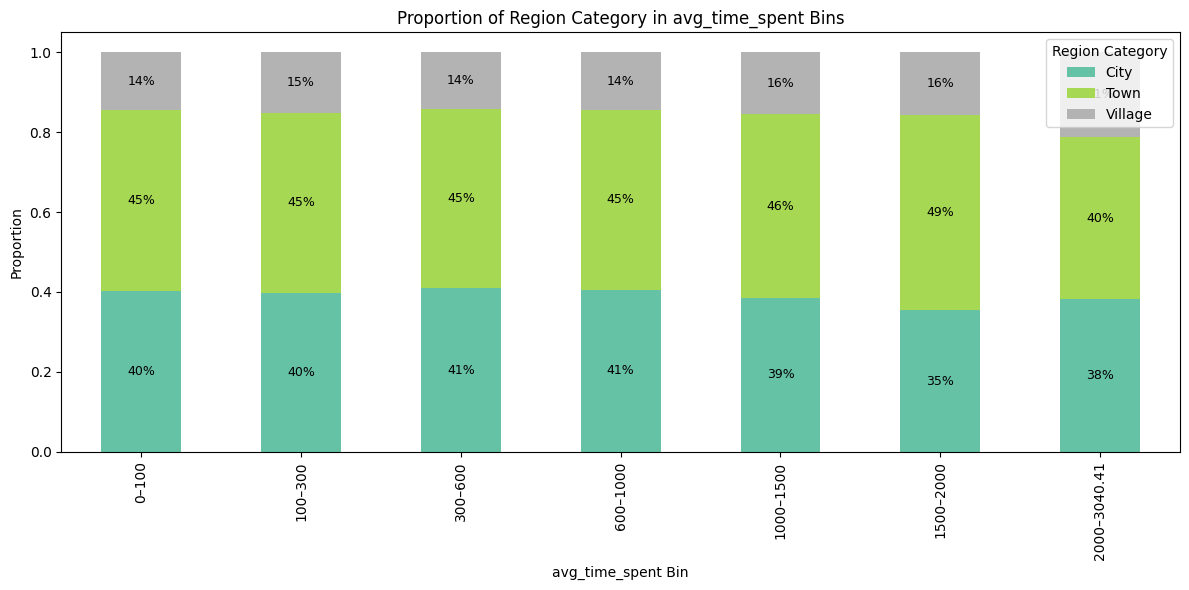

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean data
df_clean = df[['avg_time_spent', 'region_category']].dropna()

# Create bins
bins = [0, 100, 300, 600, 1000, 1500, 2000, df_clean['avg_time_spent'].max()]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]
df_clean['time_bin'] = pd.cut(df_clean['avg_time_spent'], bins=bins, labels=labels, include_lowest=True)

# Group and normalize
grouped = df_clean.groupby(['time_bin', 'region_category']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Proportion of Region Category in avg_time_spent Bins')
plt.ylabel('Proportion')
plt.xlabel('avg_time_spent Bin')
plt.legend(title='Region Category')

# Add percentage labels
for i, bin_label in enumerate(proportions.index):
    bottom = 0
    for category in proportions.columns:
        value = proportions.loc[bin_label, category]
        if value > 0.01:  # Only show if >1%
            ax.text(i, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=9)
        bottom += value

plt.tight_layout()
plt.show()


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/1101993960.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



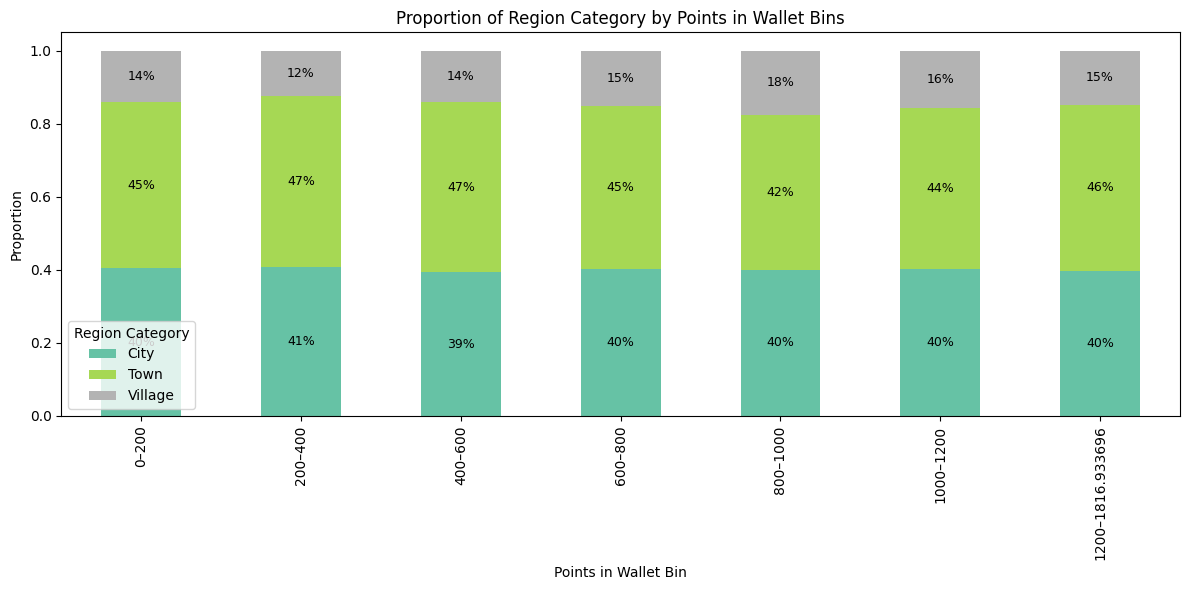

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df[['points_in_wallet', 'region_category']].dropna()

# Define bins for points_in_wallet
bins = [0, 200, 400, 600, 800, 1000, 1200, df_clean['points_in_wallet'].max()]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

# Create bin column
df_clean['wallet_bin'] = pd.cut(df_clean['points_in_wallet'], bins=bins, labels=labels, include_lowest=True)

# Count and normalize
grouped = df_clean.groupby(['wallet_bin', 'region_category']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Proportion of Region Category by Points in Wallet Bins')
plt.ylabel('Proportion')
plt.xlabel('Points in Wallet Bin')
plt.legend(title='Region Category')

# Add percentage labels
for i, bin_label in enumerate(proportions.index):
    bottom = 0
    for category in proportions.columns:
        value = proportions.loc[bin_label, category]
        if value > 0.01:
            ax.text(i, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=9)
        bottom += value

plt.tight_layout()
plt.show()


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/3703025978.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



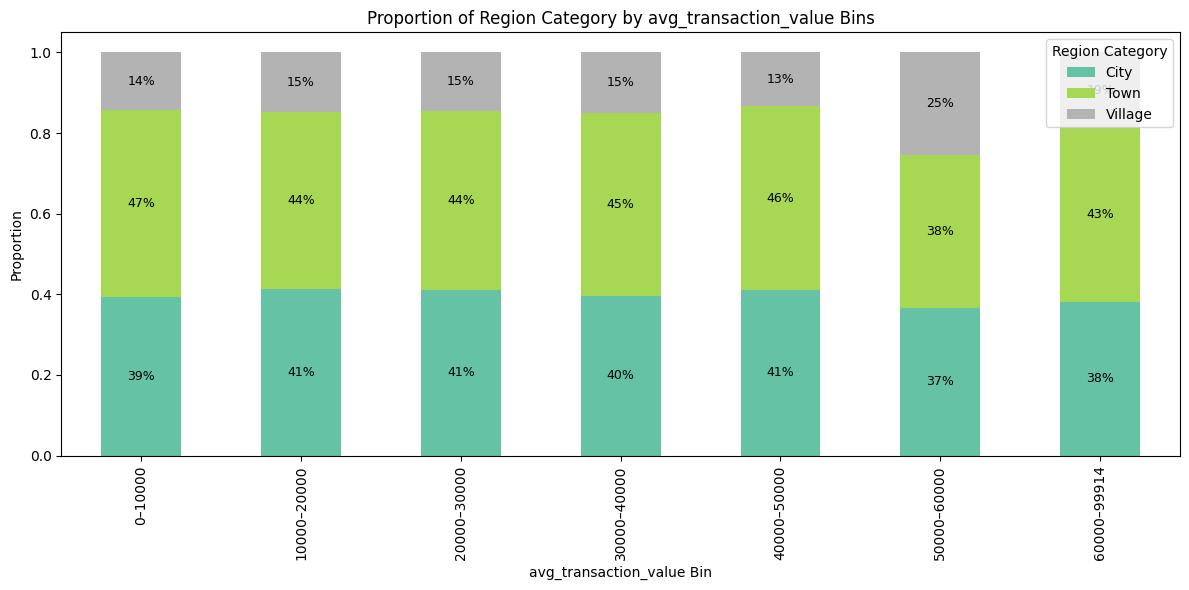

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean the data
df_clean = df[['avg_transaction_value', 'region_category']].dropna()

# Define bins for avg_transaction_value
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, df_clean['avg_transaction_value'].max()]
labels = [f'{bins[i]}–{bins[i+1]:.0f}' for i in range(len(bins)-1)]

# Create bin column
df_clean['transaction_bin'] = pd.cut(df_clean['avg_transaction_value'], bins=bins, labels=labels, include_lowest=True)

# Group and normalize
grouped = df_clean.groupby(['transaction_bin', 'region_category']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Proportion of Region Category by avg_transaction_value Bins')
plt.ylabel('Proportion')
plt.xlabel('avg_transaction_value Bin')
plt.legend(title='Region Category')

# Add percentage labels
for i, bin_label in enumerate(proportions.index):
    bottom = 0
    for category in proportions.columns:
        value = proportions.loc[bin_label, category]
        if value > 0.01:
            ax.text(i, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=9)
        bottom += value

plt.tight_layout()
plt.show()


In [113]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Clean data
df_clean = df[['avg_transaction_value', 'avg_time_spent', 'region_category']].dropna()

# Define bins
tx_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, df_clean['avg_transaction_value'].max()]
time_bins = [0, 100, 300, 600, 1000, 1500, 2000, df_clean['avg_time_spent'].max()]

tx_labels = [f'{tx_bins[i]}–{int(tx_bins[i+1])}' for i in range(len(tx_bins)-1)]
time_labels = [f'{time_bins[i]}–{int(time_bins[i+1])}' for i in range(len(time_bins)-1)]

df_clean['tx_bin'] = pd.cut(df_clean['avg_transaction_value'], bins=tx_bins, labels=tx_labels, include_lowest=True)
df_clean['time_bin'] = pd.cut(df_clean['avg_time_spent'], bins=time_bins, labels=time_labels, include_lowest=True)

# Group and calculate proportions
grouped = df_clean.groupby(['tx_bin', 'time_bin', 'region_category']).size().reset_index(name='count')
totals = grouped.groupby(['tx_bin', 'time_bin'])['count'].sum().reset_index(name='total')
merged = pd.merge(grouped, totals, on=['tx_bin', 'time_bin'])
merged['proportion'] = merged['count'] / merged['total']

# Create codes for 3D coordinates
merged['x'] = merged['tx_bin'].cat.codes
merged['y'] = merged['time_bin'].cat.codes
merged['z'] = merged['proportion']

# Prepare traces
fig = go.Figure()
colors = ['red', 'green', 'blue', 'orange', 'purple']
regions = merged['region_category'].unique()

for i, region in enumerate(regions):
    region_data = merged[merged['region_category'] == region]
    fig.add_trace(go.Scatter3d(
        x=region_data['x'],
        y=region_data['y'],
        z=region_data['z'],
        mode='markers',
        marker=dict(
            size=region_data['z'] * 50,  # Adjust marker size
            color=colors[i % len(colors)],
            opacity=0.8
        ),
        name=region
    ))

# Layout
fig.update_layout(
    title='3D Scatter of Region Category Proportions by Transaction & Time Spent',
    scene=dict(
        xaxis=dict(title='avg_transaction_value Bin', tickvals=list(range(len(tx_labels))), ticktext=tx_labels),
        yaxis=dict(title='avg_time_spent Bin', tickvals=list(range(len(time_labels))), ticktext=time_labels),
        zaxis=dict(title='Proportion')
    ),
    height=700,
    showlegend=True
)

fig.show()


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/982006151.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/982006151.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [117]:
## Trying to explain the preferred_offer_types

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/1154325290.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



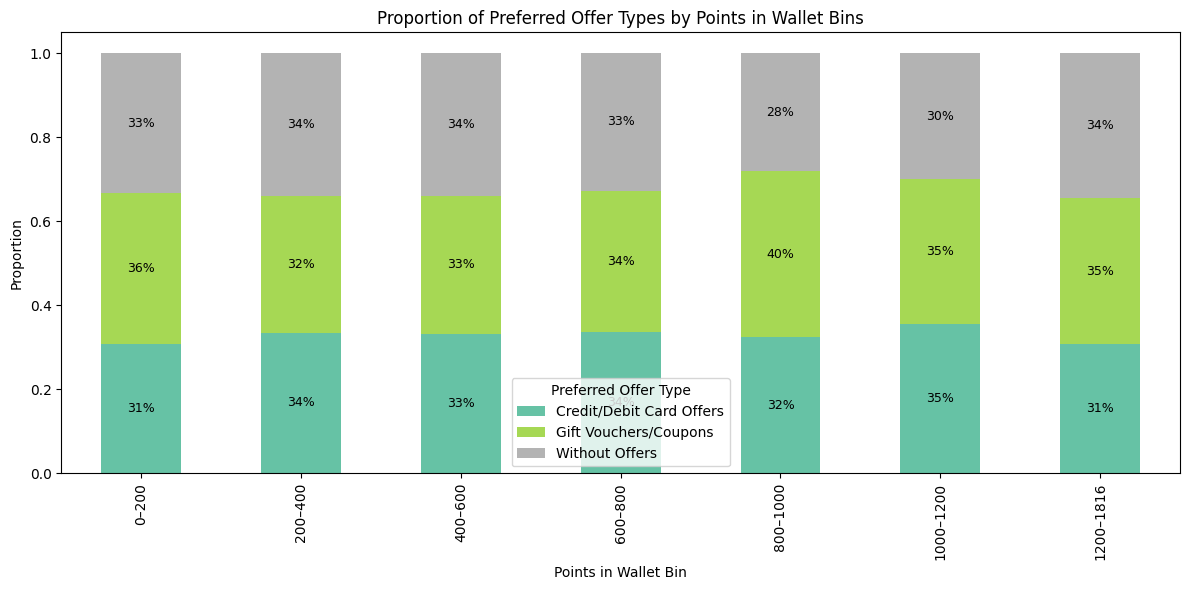

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values
df_clean = df[['points_in_wallet', 'preferred_offer_types']].dropna()

# Define bins for points_in_wallet
bins = [0, 200, 400, 600, 800, 1000, 1200, df_clean['points_in_wallet'].max()]
labels = [f'{bins[i]}–{int(bins[i+1])}' for i in range(len(bins)-1)]
df_clean['wallet_bin'] = pd.cut(df_clean['points_in_wallet'], bins=bins, labels=labels, include_lowest=True)

# Group and normalize
grouped = df_clean.groupby(['wallet_bin', 'preferred_offer_types']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Proportion of Preferred Offer Types by Points in Wallet Bins')
plt.ylabel('Proportion')
plt.xlabel('Points in Wallet Bin')
plt.legend(title='Preferred Offer Type')

# Add percentage labels
for i, bin_label in enumerate(proportions.index):
    bottom = 0
    for category in proportions.columns:
        value = proportions.loc[bin_label, category]
        if value > 0.01:
            ax.text(i, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=9)
        bottom += value

plt.tight_layout()
plt.show()


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/1881086018.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



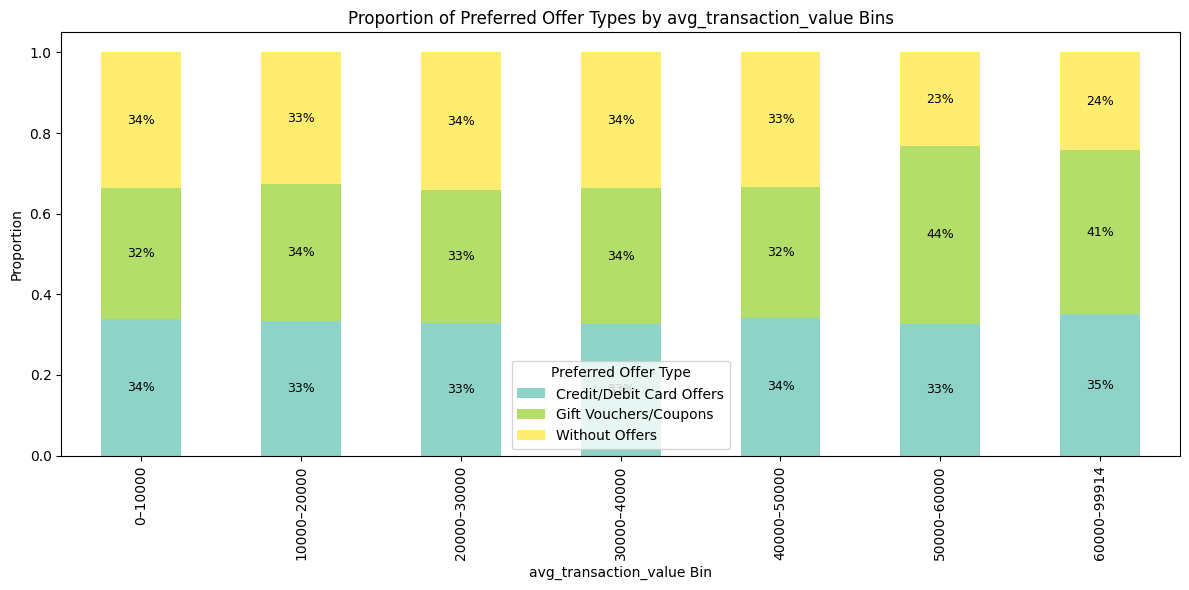

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and filter data
df_clean = df[['avg_transaction_value', 'preferred_offer_types']].dropna()

# Define bins for avg_transaction_value
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, df_clean['avg_transaction_value'].max()]
labels = [f'{int(bins[i])}–{int(bins[i+1])}' for i in range(len(bins)-1)]

# Create bin labels
df_clean['transaction_bin'] = pd.cut(df_clean['avg_transaction_value'], bins=bins, labels=labels, include_lowest=True)

# Group and normalize
grouped = df_clean.groupby(['transaction_bin', 'preferred_offer_types']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plot
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Proportion of Preferred Offer Types by avg_transaction_value Bins')
plt.ylabel('Proportion')
plt.xlabel('avg_transaction_value Bin')
plt.legend(title='Preferred Offer Type')

# Add percentage labels inside each segment
for i, bin_label in enumerate(proportions.index):
    bottom = 0
    for category in proportions.columns:
        value = proportions.loc[bin_label, category]
        if value > 0.01:
            ax.text(i, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=9)
        bottom += value

plt.tight_layout()
plt.show()


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/3499724922.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/3499724922.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/3499724922.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc

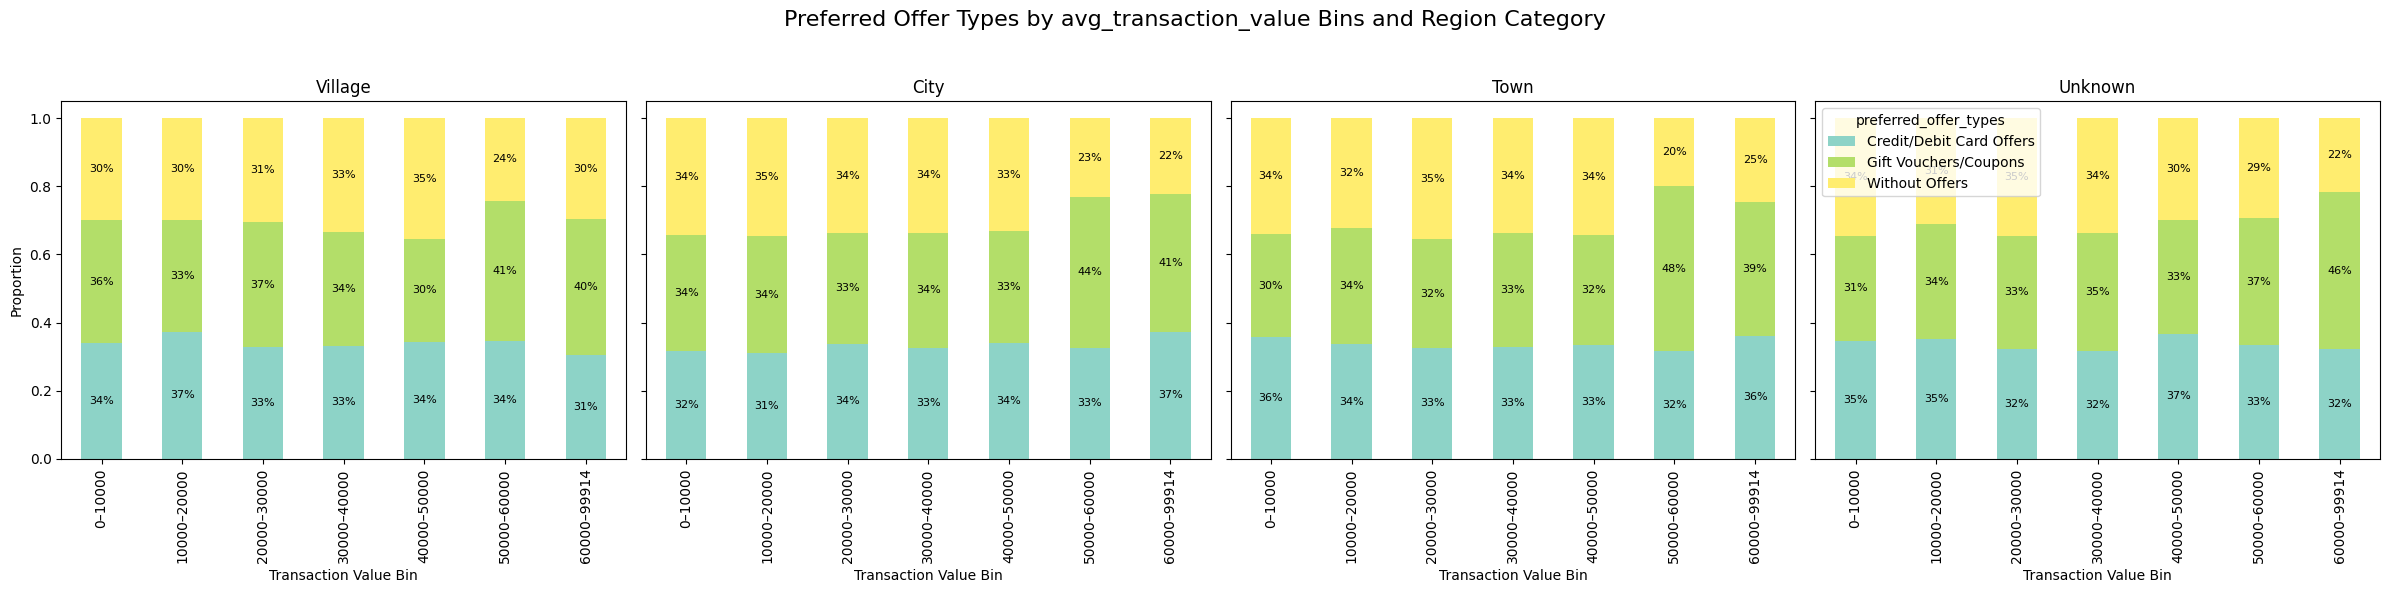

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_clean = df[['avg_transaction_value', 'preferred_offer_types', 'region_category']].dropna()

# Define bins for avg_transaction_value
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, df_clean['avg_transaction_value'].max()]
labels = [f'{int(bins[i])}–{int(bins[i+1])}' for i in range(len(bins)-1)]
df_clean['transaction_bin'] = pd.cut(df_clean['avg_transaction_value'], bins=bins, labels=labels, include_lowest=True)

# Get list of unique regions
regions = df_clean['region_category'].unique()

# Create subplots: one per region
fig, axes = plt.subplots(nrows=1, ncols=len(regions), figsize=(6 * len(regions), 6), sharey=True)

for i, region in enumerate(regions):
    region_df = df_clean[df_clean['region_category'] == region]
    
    # Group and normalize
    grouped = region_df.groupby(['transaction_bin', 'preferred_offer_types']).size().unstack(fill_value=0)
    proportions = grouped.div(grouped.sum(axis=1), axis=0)
    
    # Plot
    ax = axes[i] if len(regions) > 1 else axes
    proportions.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', legend=(i == len(regions)-1))
    ax.set_title(f'{region}')
    ax.set_xlabel('Transaction Value Bin')
    if i == 0:
        ax.set_ylabel('Proportion')
    else:
        ax.set_ylabel('')
    
    # Add percentage labels
    for j, bin_label in enumerate(proportions.index):
        bottom = 0
        for category in proportions.columns:
            value = proportions.loc[bin_label, category]
            if value > 0.01:
                ax.text(j, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=8)
            bottom += value

fig.suptitle('Preferred Offer Types by avg_transaction_value Bins and Region Category', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/166180906.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/166180906.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/166180906.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc000

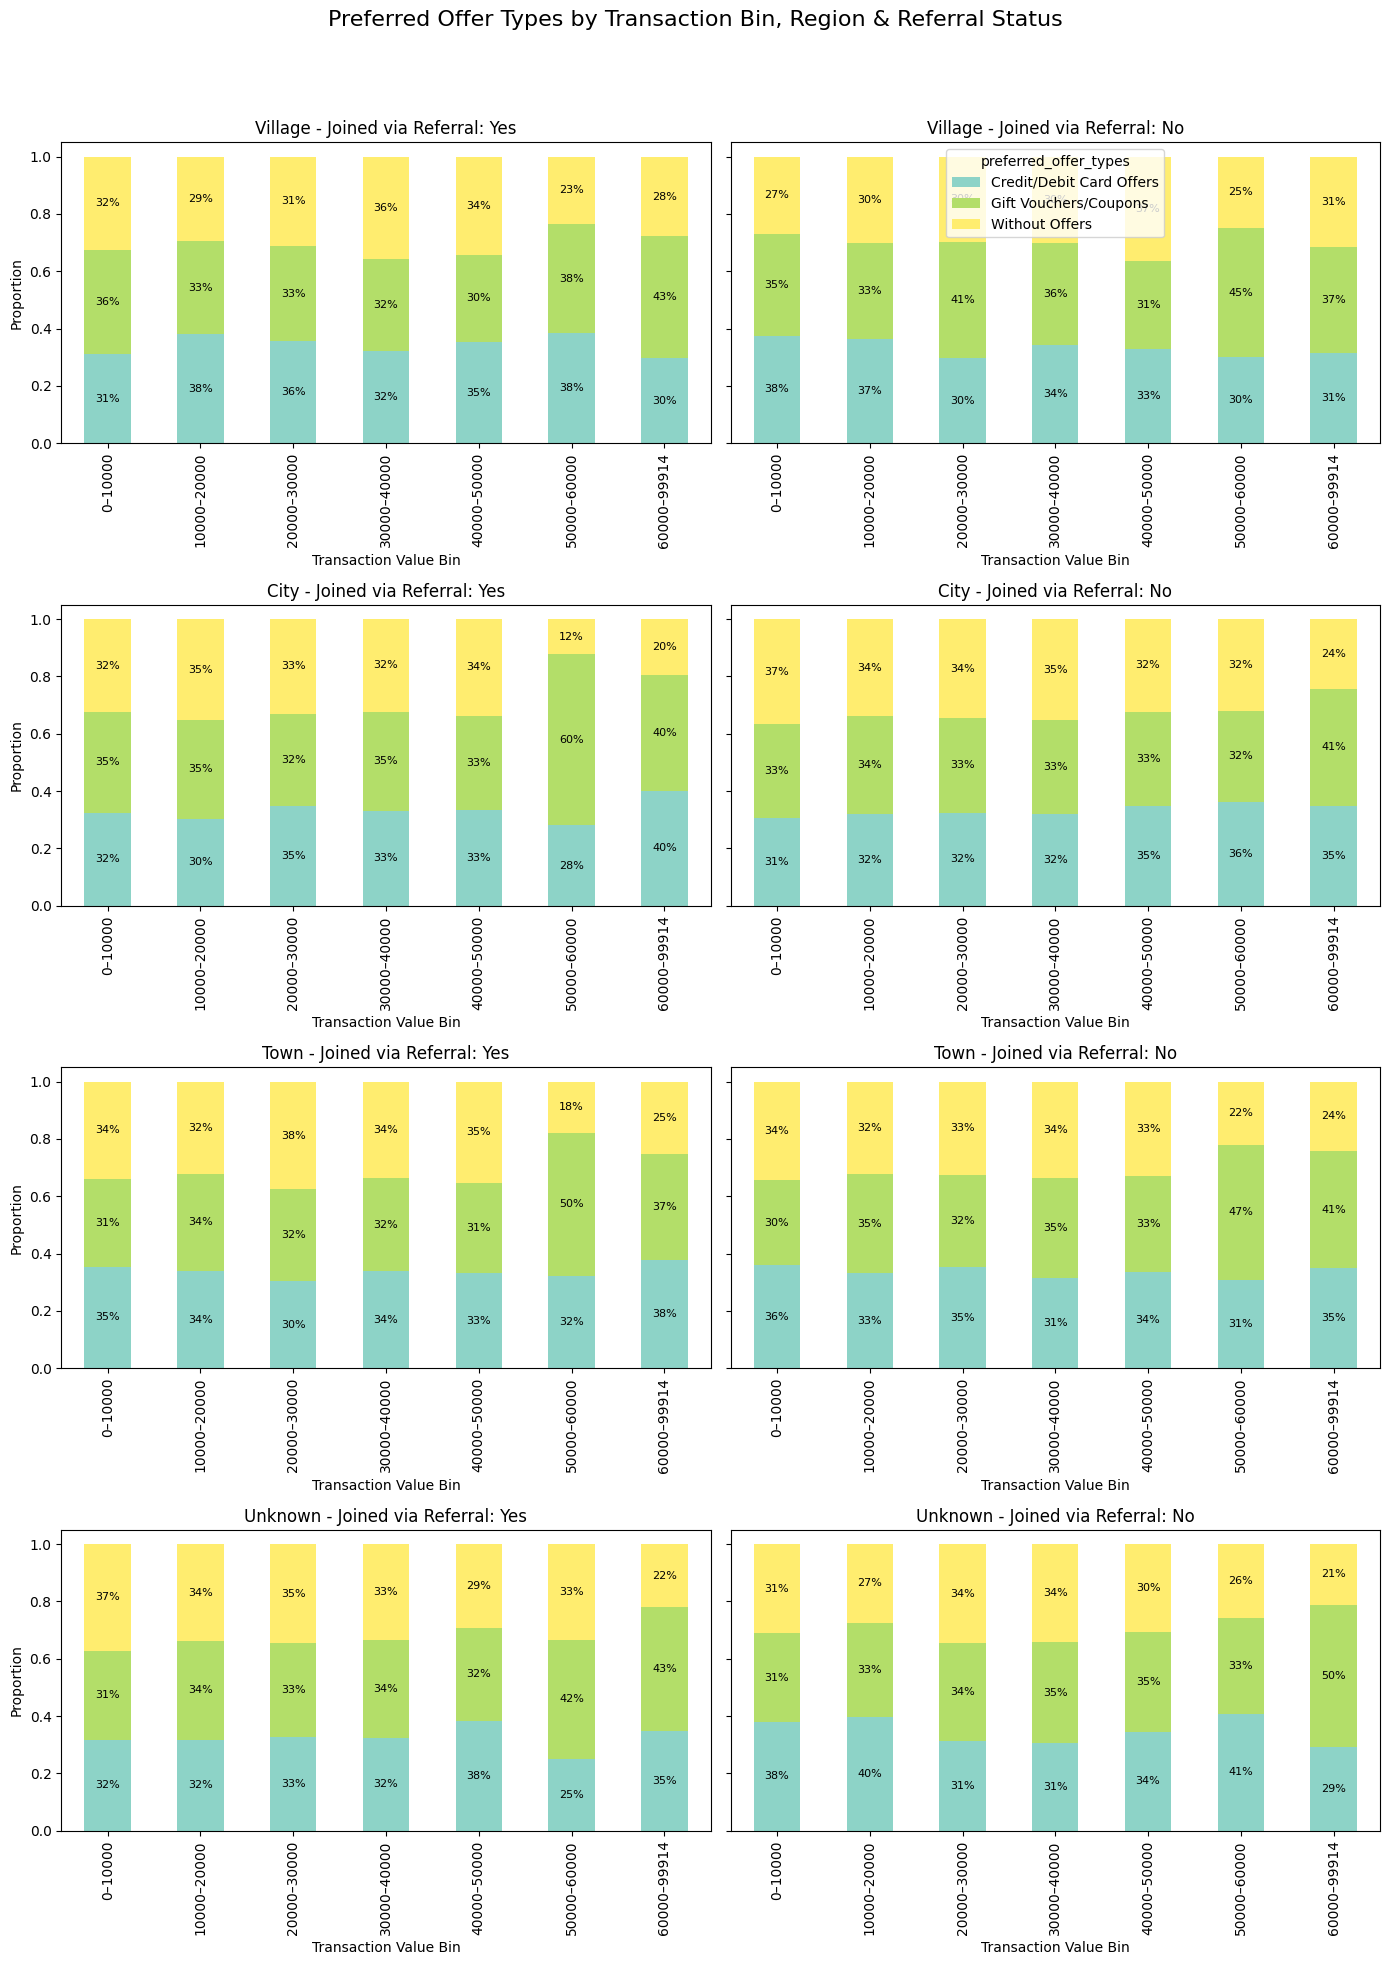

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and prepare data
df_clean = df[['avg_transaction_value', 'preferred_offer_types', 'region_category', 'joined_through_referral']].dropna()

# Normalize 'joined_through_referral' to strings ('Yes', 'No') if needed
if df_clean['joined_through_referral'].dtype != 'object':
    df_clean['joined_through_referral'] = df_clean['joined_through_referral'].map({1: 'Yes', 0: 'No'})

# Define bins for avg_transaction_value
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, df_clean['avg_transaction_value'].max()]
labels = [f'{int(bins[i])}–{int(bins[i+1])}' for i in range(len(bins)-1)]
df_clean['transaction_bin'] = pd.cut(df_clean['avg_transaction_value'], bins=bins, labels=labels, include_lowest=True)

# Get all unique combinations of region and referral
regions = df_clean['region_category'].unique()
referral_status = ['Yes', 'No']
n_cols = len(referral_status)
n_rows = len(regions)

# Set up the plot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7 * n_cols, 5 * n_rows), sharey=True)

for i, region in enumerate(regions):
    for j, referral in enumerate(referral_status):
        subset = df_clean[(df_clean['region_category'] == region) & 
                          (df_clean['joined_through_referral'] == referral)]
        
        ax = axes[i, j] if n_rows > 1 else axes[j]
        
        if not subset.empty:
            # Group and normalize
            grouped = subset.groupby(['transaction_bin', 'preferred_offer_types']).size().unstack(fill_value=0)
            proportions = grouped.div(grouped.sum(axis=1), axis=0)

            # Plot
            proportions.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', legend=(i == 0 and j == 1))
            
            ax.set_title(f"{region} - Joined via Referral: {referral}")
            ax.set_xlabel('Transaction Value Bin')
            if j == 0:
                ax.set_ylabel('Proportion')

            # Add percentage labels
            for k, bin_label in enumerate(proportions.index):
                bottom = 0
                for offer in proportions.columns:
                    value = proportions.loc[bin_label, offer]
                    if value > 0.01:
                        ax.text(k, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=8)
                    bottom += value
        else:
            ax.set_title(f"{region} - Joined via Referral: {referral}")
            ax.set_xlabel('Transaction Value Bin')
            ax.set_ylabel('Proportion')
            ax.text(0.5, 0.5, 'No data', transform=ax.transAxes,
                    ha='center', va='center', fontsize=12, color='gray')

# Final layout
fig.suptitle('Preferred Offer Types by Transaction Bin, Region & Referral Status', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [122]:
## Trying to explain the medium_of_operation

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/1091937697.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/1091937697.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_4809/1091937697.py:34: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc

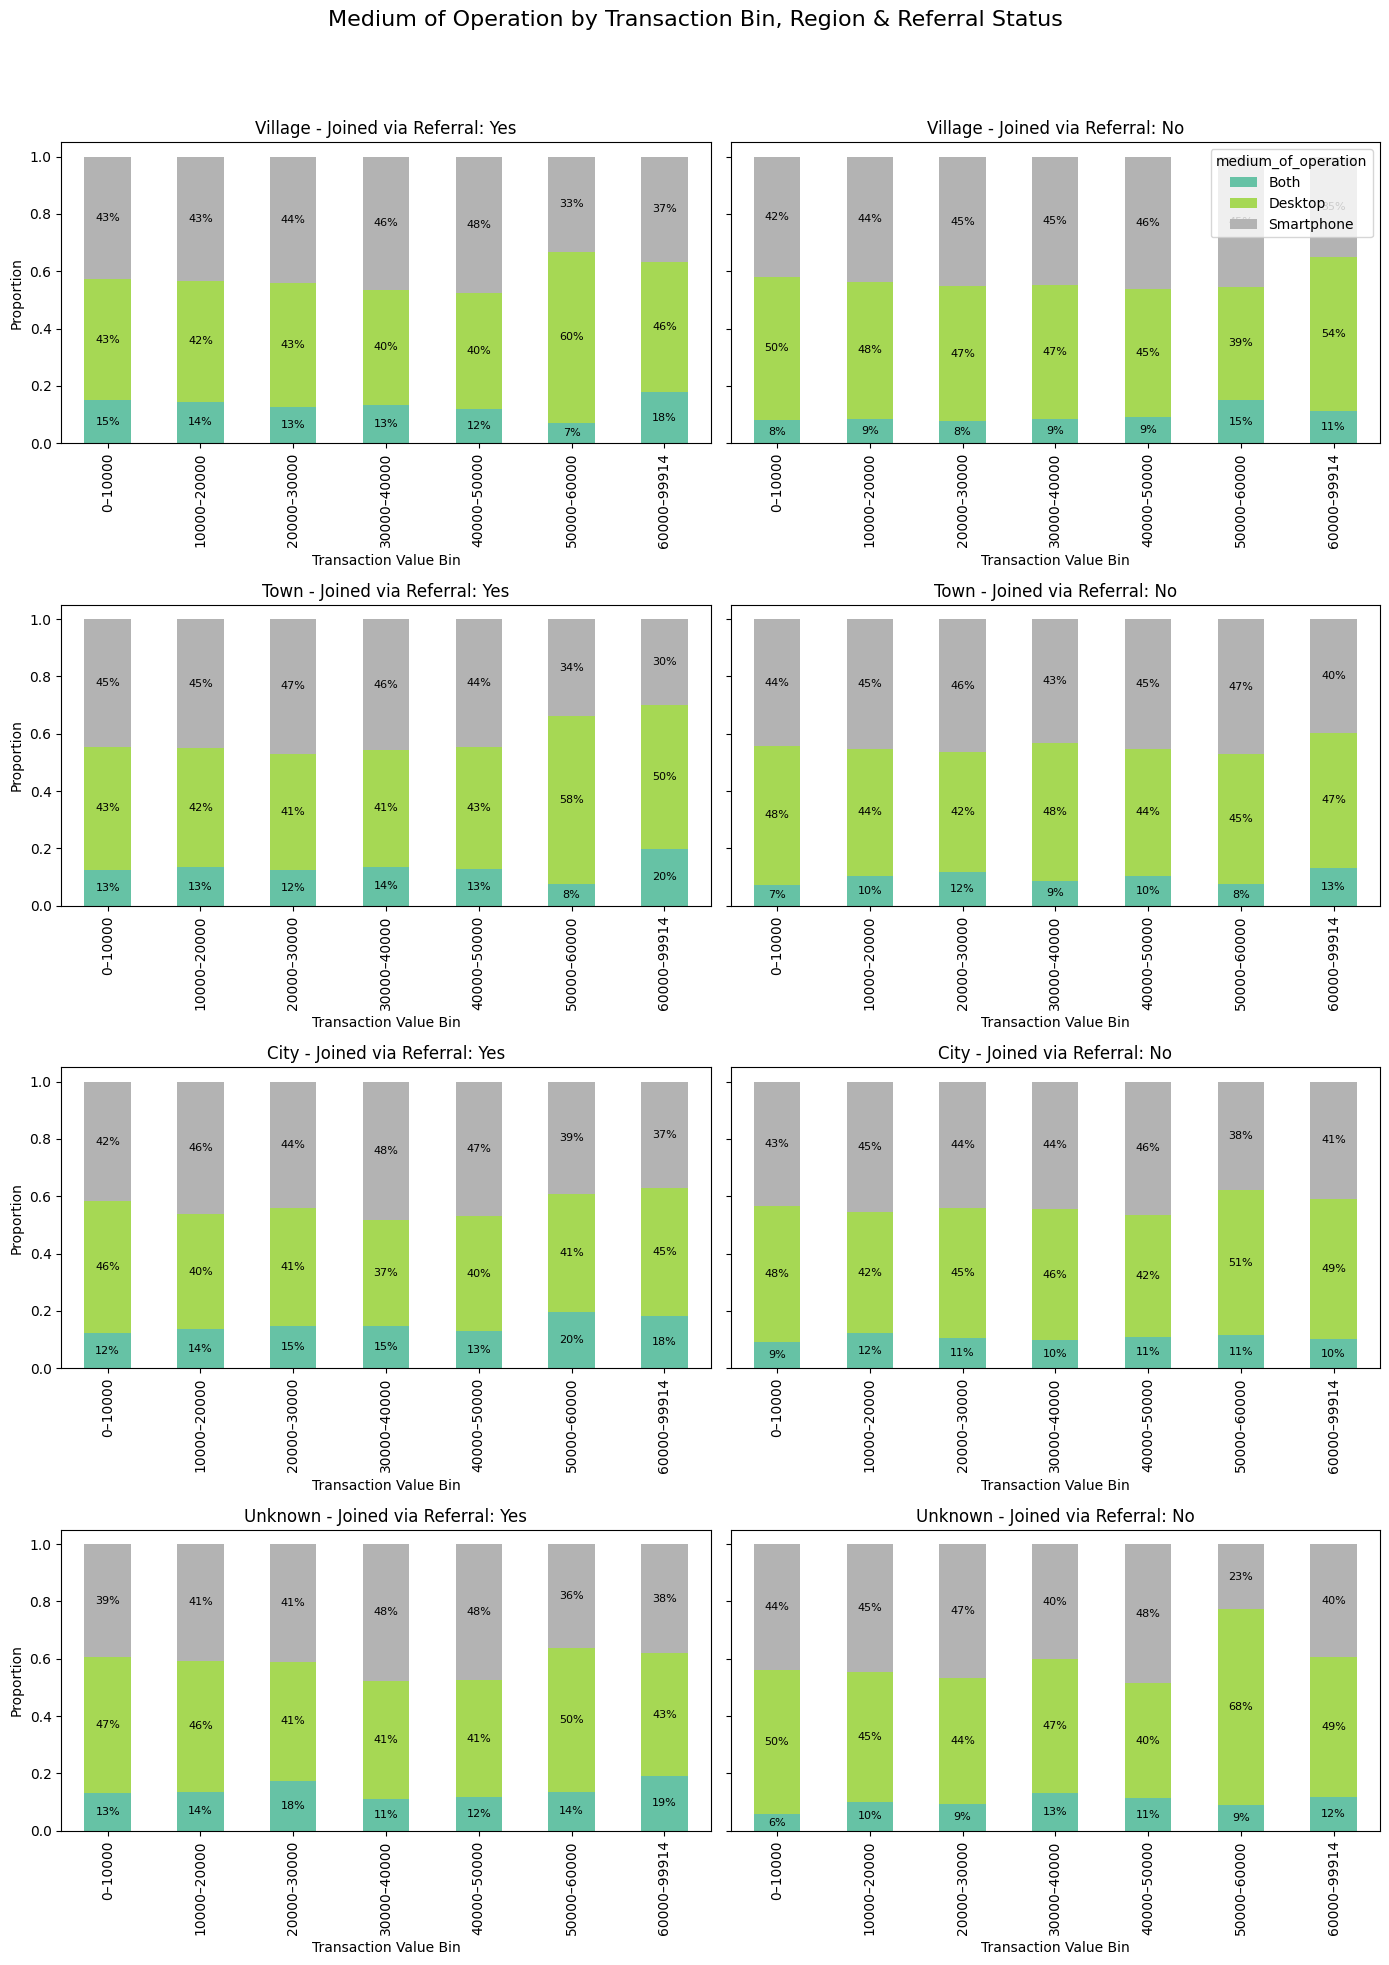

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and prepare data
df_clean = df[['avg_transaction_value', 'medium_of_operation', 'region_category', 'joined_through_referral']].dropna()

# Normalize 'joined_through_referral' to strings
if df_clean['joined_through_referral'].dtype != 'object':
    df_clean['joined_through_referral'] = df_clean['joined_through_referral'].map({1: 'Yes', 0: 'No'})

# Define bins for avg_transaction_value
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, df_clean['avg_transaction_value'].max()]
labels = [f'{int(bins[i])}–{int(bins[i+1])}' for i in range(len(bins)-1)]
df_clean['transaction_bin'] = pd.cut(df_clean['avg_transaction_value'], bins=bins, labels=labels, include_lowest=True)

# Get all unique combinations
regions = df_clean['region_category'].unique()
referral_status = ['Yes', 'No']
n_cols = len(referral_status)
n_rows = len(regions)

# Set up the plot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7 * n_cols, 5 * n_rows), sharey=True)

for i, region in enumerate(regions):
    for j, referral in enumerate(referral_status):
        subset = df_clean[(df_clean['region_category'] == region) &
                          (df_clean['joined_through_referral'] == referral)]

        ax = axes[i, j] if n_rows > 1 else axes[j]

        if not subset.empty:
            # Group and normalize
            grouped = subset.groupby(['transaction_bin', 'medium_of_operation']).size().unstack(fill_value=0)
            proportions = grouped.div(grouped.sum(axis=1), axis=0)

            # Plot
            proportions.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', legend=(i == 0 and j == 1))

            ax.set_title(f"{region} - Joined via Referral: {referral}")
            ax.set_xlabel('Transaction Value Bin')
            if j == 0:
                ax.set_ylabel('Proportion')

            # Add percentage labels
            for k, bin_label in enumerate(proportions.index):
                bottom = 0
                for category in proportions.columns:
                    value = proportions.loc[bin_label, category]
                    if value > 0.01:
                        ax.text(k, bottom + value / 2, f'{value:.0%}', ha='center', va='center', fontsize=8)
                    bottom += value
        else:
            ax.set_title(f"{region} - Joined via Referral: {referral}")
            ax.set_xlabel('Transaction Value Bin')
            ax.set_ylabel('Proportion')
            ax.text(0.5, 0.5, 'No data', transform=ax.transAxes,
                    ha='center', va='center', fontsize=12, color='gray')

# Final layout
fig.suptitle('Medium of Operation by Transaction Bin, Region & Referral Status', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [125]:
# scatter plot of avg_transaction_value and points_in_wallet with plotly
import plotly.express as px
fig = px.scatter(df, x='avg_transaction_value', y='points_in_wallet',
                 title='Scatter plot of avg_transaction_value and points_in_wallet')
fig.update_traces(marker=dict(size=5, opacity=0.5))
fig.update_layout(title_x=0.5)
fig.show()